In [1]:
library(tidyverse)
library(ggthemes)
library(corrplot)
library(GGally)
library(DT)
library(caret)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

corrplot 0.84 loaded

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘GGally’


The following object is masked from ‘package:dplyr’:

    nasa


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




In [3]:
# Set the blank spaces to NA's
loan = read_csv("../input/lending-club-loan-data/loan.csv" , na = "")

Parsed with column specification:
cols(
  .default = col_double(),
  id = col_logical(),
  member_id = col_logical(),
  term = col_character(),
  grade = col_character(),
  sub_grade = col_character(),
  emp_title = col_character(),
  emp_length = col_character(),
  home_ownership = col_character(),
  verification_status = col_character(),
  issue_d = col_character(),
  loan_status = col_character(),
  pymnt_plan = col_character(),
  url = col_logical(),
  desc = col_logical(),
  purpose = col_character(),
  title = col_character(),
  zip_code = col_character(),
  addr_state = col_character(),
  earliest_cr_line = col_character(),
  initial_list_status = col_character()
  # ... with 29 more columns
)

See spec(...) for full column specifications.

Warning message:
“462349 parsing failures.
  row                       col           expected   actual                                       file
92797 debt_settlement_flag_date 1/0/T/F/TRUE/FALSE Feb-2019 '../input/lending-club-loan-data/loa

This dataset contains of information of age, annual income, home ownership, and other variables that affect the probability of default of the borrower. The columns we are going to use can be seen below:

1. loan_status : Variable with multiple levels (e.g. Charged off, Current, Default, Fully Paid …)
2. loan_amnt : Total amount of loan taken by the customer
3. int_rate : Loan interset rate
4. grade : Grade of employment
5. emp_length : Duration of employment
6. home_ownership : Type of ownership of house
7. annual_inc : Total annual income
8. term : 36-month or 60-month period

In [4]:
# Select only the columns mentioned above.
loan_filtered = loan %>%
        select(loan_status , loan_amnt , int_rate , grade , emp_length , home_ownership , 
               annual_inc , term)
loan_filtered

loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
Current,2500,13.56,C,10+ years,RENT,55000,36 months
Current,30000,18.94,D,10+ years,MORTGAGE,90000,60 months
Current,5000,17.97,D,6 years,MORTGAGE,59280,36 months
Current,4000,18.94,D,10+ years,MORTGAGE,92000,36 months
Current,30000,16.14,C,10+ years,MORTGAGE,57250,60 months
Current,5550,15.02,C,10+ years,MORTGAGE,152500,36 months
Current,2000,17.97,D,4 years,RENT,51000,36 months
Current,6000,13.56,C,10+ years,RENT,65000,36 months
Current,5000,17.97,D,10+ years,MORTGAGE,53580,36 months


Now let's look for missing values:

In [5]:
sapply(loan_filtered , function(x) sum(is.na(x)))

loan_status      loan_amnt       int_rate          grade     emp_length 
             0              0              0              0              0 
home_ownership     annual_inc           term 
             0              4              0

In [6]:
#Let's get rid of the missing values and other NA's
loan_final = loan_filtered %>%
        filter(!is.na(annual_inc) , 
               !(home_ownership %in% c('NONE' , 'ANY')) , 
               emp_length != 'n/a')

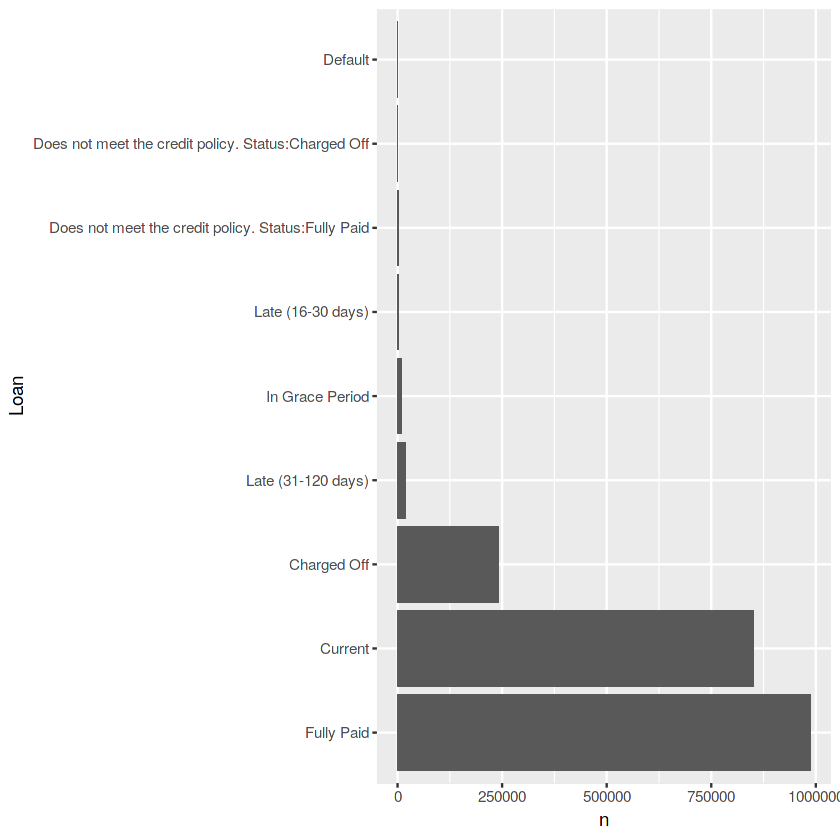

In [7]:
loan_final %>%
    count(loan_status) %>%
    ggplot(aes(x = reorder(loan_status, desc(n)), y = n))+
    geom_col() +
    coord_flip()+
    labs(x = "Loan", y = "n")

So I want to put a regression on this data. However, I want to convert the variable above to a 1 for defualt and 0 for non-default. We have 10 levels above. Outcomes such as Late, or in grace period need to be removed. 

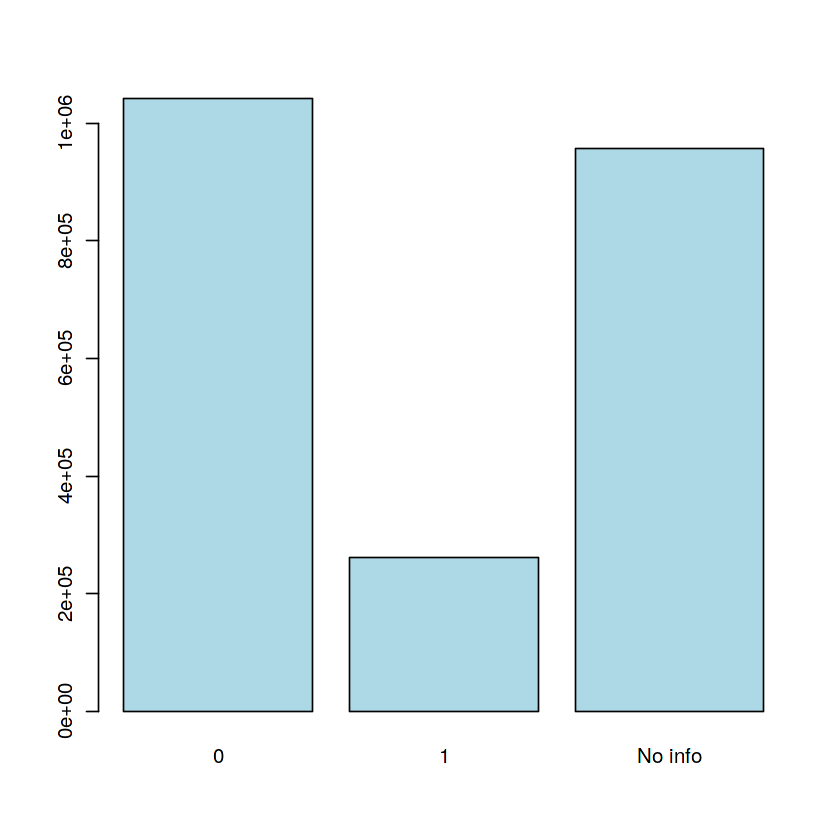

In [15]:
loan_final = loan_final%>%
        mutate(loan_outcome = ifelse(loan_status %in% c('Charged Off' , 'Default') , 
                                     1, 
                                     ifelse(loan_status == 'Fully Paid' , 0 , 'No info')
                                     ))

barplot(table(loan$loan_outcome) , col = 'lightblue')

So let's create the new dataset here:

In [17]:
# Create the new dataset by filtering 0's and 1's in the loan_outcome column and remove loan_status column for the modelling
loan_model = loan_final %>%
        select(-loan_status) %>%
        filter(loan_outcome %in% c(0 , 1))
head(loan_model)

loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term,loan_outcome
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
30000,22.35,D,5 years,MORTGAGE,100000,36 months,0
40000,16.14,C,< 1 year,MORTGAGE,45000,60 months,0
20000,7.56,A,10+ years,MORTGAGE,100000,36 months,0
4500,11.31,B,10+ years,RENT,38500,36 months,0
8425,27.27,E,3 years,MORTGAGE,450000,36 months,0
20000,17.97,D,4 years,RENT,57000,60 months,0


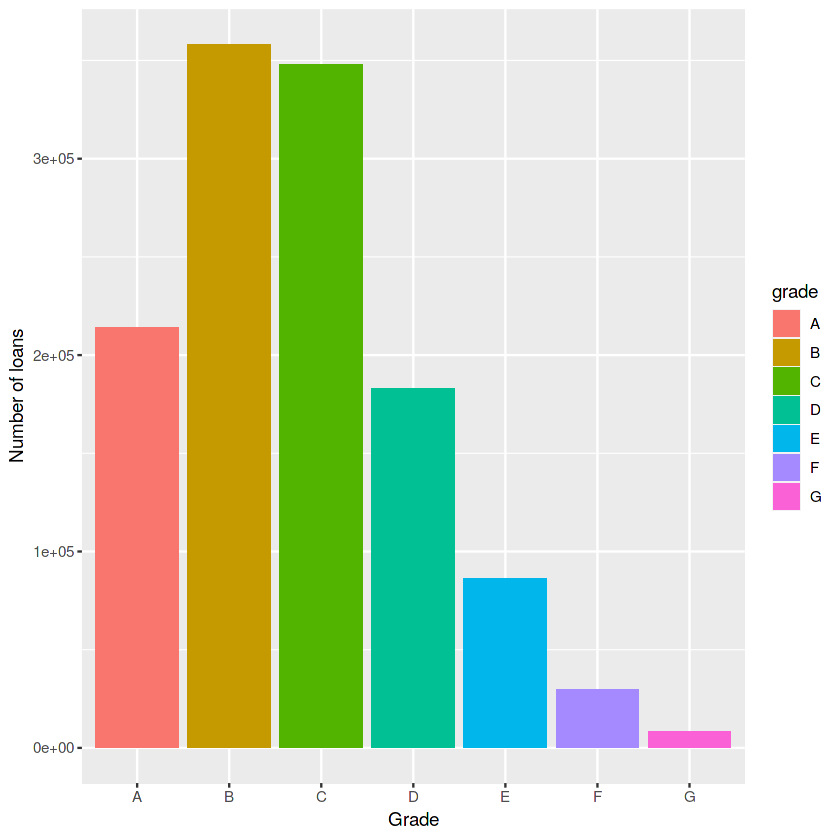

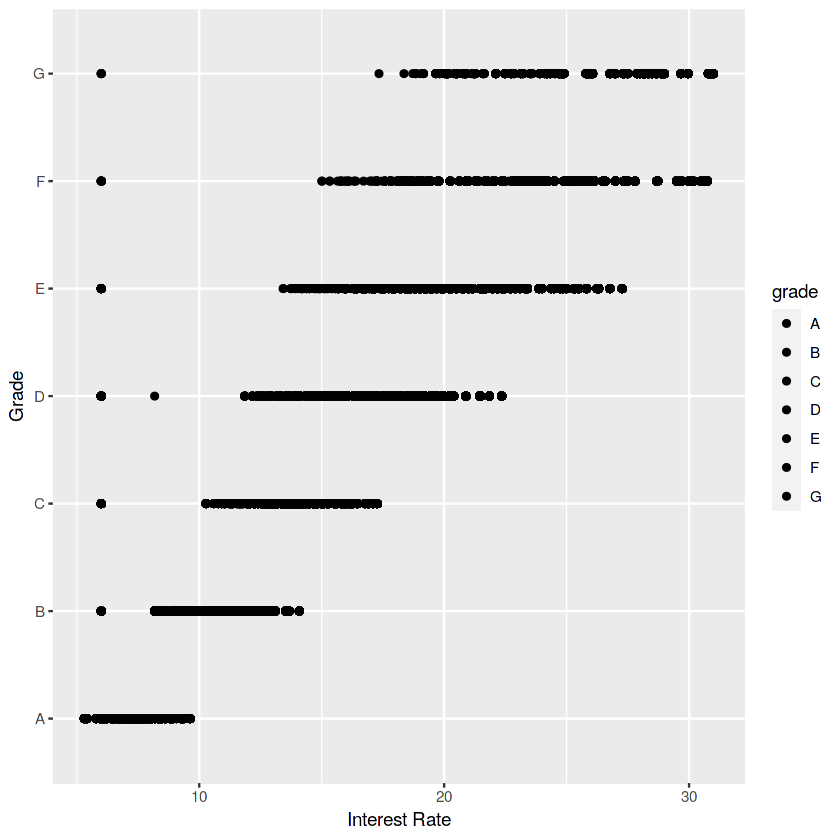

In [28]:
ggplot(loan_model , aes(x = grade , fill = grade)) + 
        geom_bar() + 
        labs(y = 'Number of loans' , x = 'Grade')
ggplot(loan_model , aes(x = int_rate ,y = grade, fill = grade)) + 
        geom_point() + 
        labs(y = 'Grade' , x = 'Interest Rate')


In [29]:
table(loan_model$grade , factor(loan_model$loan_outcome , c(0 , 1) , c('Fully Paid' , 'Default')))

   
    Fully Paid Default
  A     201708   12424
  B     311584   46655
  C     271318   76680
  D     128042   54771
  E      53267   33064
  F      16447   13413
  G       4285    4227

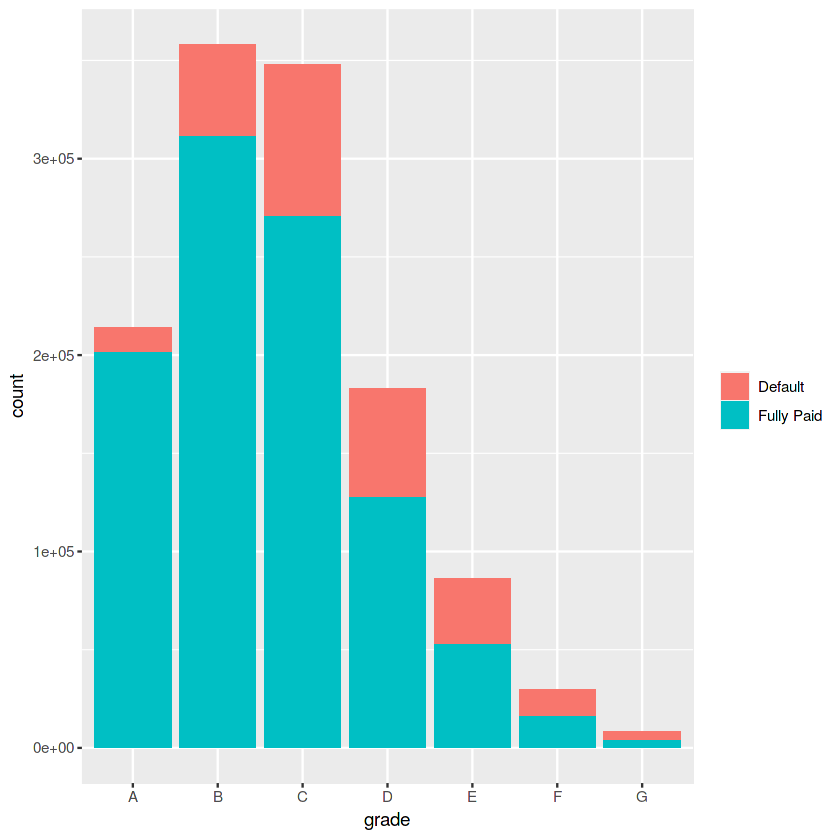

In [30]:
ggplot(loan_model , aes(x = grade , y = ..count.. , fill = factor(loan_outcome , c(1 , 0) , c('Default' , 'Fully Paid')))) + 
        geom_bar() + 
        theme(legend.title = element_blank())

Let's look at the relationship with Annual Income:

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 104 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 104 rows containing missing values (geom_point).”
ERROR while rich displaying an object: Error in grDevices::col2rgb(colour, TRUE): invalid color name 'darkyellow'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- 

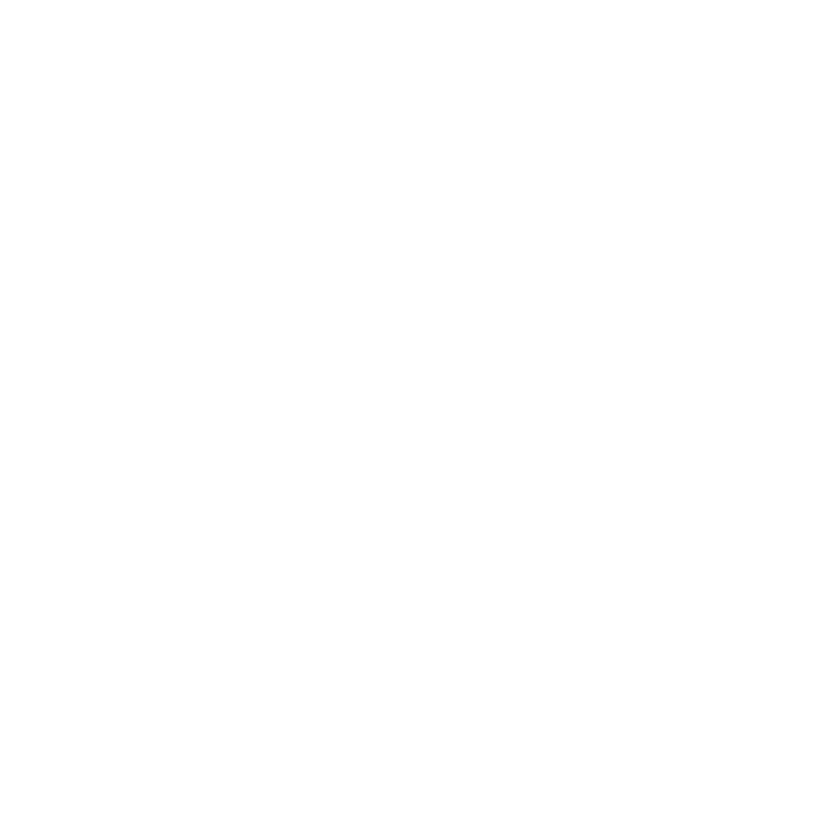

In [33]:
ggplot(loan_model[sample(10000 , 10000) , ] , aes(x = annual_inc , y = loan_amnt , color = int_rate)) +
        geom_point(alpha = 0.5 , size = 1.5) + 
        geom_smooth(se = F , color = 'yellow' , method = 'loess') +
        xlim(c(0 , 300000)) + 
        labs(x = 'Annual Income' , y = 'Loan Ammount' , color = 'Interest Rate')